**Analysis for the Prediction and the extracted grammer structure by the model**    


In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})

In [ ]:
from matplotlib import rc
rc('pdf', fonttype=42)

In [ ]:
files = [2125,2126,2131,2132,2133]+np.arange(2135,2140).tolist() +np.arange(21009,21016).tolist() +np.arange(21048,21051).tolist(); 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "gdrive/My Drive/Colab/NLP" 

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab/NLP


In [ ]:
import joblib
import matplotlib.pyplot as plt

In [ ]:
# +++ to save and lead matlab files +++
!pip install mat4py
from mat4py import loadmat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
INTACT = 0; BLOCK_RECURRENT = 1;
rnn_cond = BLOCK_RECURRENT;

In [ ]:
inc_tmstep_valrate = [16,16,0.9];  lr = 0.004 * np.array([1,1,1,1,1])

In [ ]:
pop_loss, pop_inc_lr,pop_acc_L, pop_acc_noL, pop_acc_pc_df, pop_svm_ax, pop_val2_acc, pop_val2_eg, pop_pca_ratio, pop_SVM_ratio, pop_acc_L_io, pop_acc_nL_io = [],[],[],[],[],[],[],[],[],[],[],[]
for i in range(len(files)):
    ver = files[i];
    w_idx, idx_to_word, sents, loss_his, inc_tmstep_valrate = joblib.load('./saved_model/np_'+'{0:03d}'.format(ver)+'.pkl')
    pop_loss.append(loss_his)
    increments = inc_tmstep_valrate[0];   train_val_rate = inc_tmstep_valrate[2];   ep_lg = (len(loss_his[0])-1)/increments;   
    if len(inc_tmstep_valrate)>3:  lr = inc_tmstep_valrate[3];  # available after ver2006
    pop_inc_lr.append( np.array( [increments, ep_lg, lr[0]] ) )
    if rnn_cond == INTACT:  data2 = loadmat('./saved_mat/v'+str(ver)+'.mat')
    else:                   data2 = loadmat('./saved_mat/v'+str(ver)+'_i.mat')
    pop_acc_L.append(data2['acc_L']);  pop_acc_noL.append(data2['acc_noL']);  
    pop_acc_pc_df.append(data2['acc_pc_df']);   pop_svm_ax.append(data2['svm_ax']);  
    pop_val2_acc.append(data2['val2_acc_a_41_42_61_0']);     pop_val2_eg.append(data2['acc2_boat_noise_book']);    
    pop_pca_ratio.append(data2['pca_val_ratio']);            pop_SVM_ratio.append(data2['var_ratio_SVM']);  
    acc_L_io = np.nan*np.ones((4,6));  acc_nL_io = np.nan*np.ones((4,6));
    if 'acc_L_io' in data2:    acc_L_io=data2['acc_L_io'];  acc_nL_io=data2['acc_nL_io'];
    pop_acc_L_io.append(acc_L_io);     pop_acc_nL_io.append(acc_nL_io);  

In [ ]:
[np.shape(pop_svm_ax[i]) for i in range(20)]

[(32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4)]

In [ ]:
pop_loss = np.stack(pop_loss, axis=2);              pop_inc_lr = np.stack(pop_inc_lr)
pop_acc_L = np.stack(pop_acc_L);                    pop_acc_noL = np.stack(pop_acc_noL)
pop_acc_pc_df = np.stack(pop_acc_pc_df, axis=2);    pop_svm_ax = np.stack(pop_svm_ax, axis=2)
pop_val2_acc = np.stack(pop_val2_acc);              pop_val2_eg = np.stack(pop_val2_eg);   
pop_pca_ratio = np.stack(pop_pca_ratio);            pop_SVM_ratio = np.stack(pop_SVM_ratio);   
pop_acc_L_io = np.stack(pop_acc_L_io, axis=2);      pop_acc_nL_io = np.stack(pop_acc_nL_io, axis=2)

In [ ]:
########### accuracy rate for all_41_42_61_0 #############
pop_val2_acc

array([[29.1, 43.5, 2.1, 50.0, 32.4],
       [28.6, 34.8, 1.1, 53.3, 32.6],
       [28.3, 43.5, 1.1, 50.0, 31.5],
       [28.9, 39.1, 2.1, 46.7, 31.7],
       [27.8, 39.1, 2.1, 50.0, 32.2],
       [27.8, 34.8, 2.1, 46.7, 32.0],
       [29.3, 39.1, 1.1, 63.3, 33.2],
       [28.7, 30.4, 2.1, 56.7, 33.0],
       [29.1, 34.8, 1.1, 53.3, 33.6],
       [28.4, 43.5, 2.1, 46.7, 31.3],
       [27.9, 39.1, 1.1, 60.0, 31.7],
       [27.6, 34.8, 1.1, 50.0, 31.1],
       [26.6, 34.8, 1.1, 46.7, 30.3],
       [26.6, 26.1, 2.1, 46.7, 30.1],
       [27.5, 43.5, 2.1, 56.7, 31.7],
       [27.2, 39.1, 1.1, 50.0, 30.3],
       [28.0, 34.8, 1.1, 43.3, 32.4],
       [28.1, 43.5, 1.1, 56.7, 30.5],
       [26.5, 34.8, 1.1, 53.3, 29.9],
       [27.0, 17.4, 1.1, 46.7, 30.1]])

In [ ]:
percntl_val2_acc = np.percentile(pop_val2_acc,[25,50,75],axis=0)

In [ ]:
percntl_val2_acc, #### prediction correct rate for val 2 ######, total, 41(pronoun), 42(V-noun), 61(preposition), (other words)

(array([[27.4, 34.8, 1.1, 46.7, 30.4],
        [27.9, 37.0, 1.1, 50.0, 31.7],
        [28.6, 40.2, 2.1, 54.2, 32.4]]),)

In [ ]:
########### accuracy rate for boat, noise, book #############
np.mean(pop_val2_eg, axis=0),  pop_val2_eg

(array([0.0, 0.0, 0.0]), array([[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0]]))

In [ ]:
pop_inc_lr, 

(array([[32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0],
        [32.0, 8.0, 0.0]]),)

In [ ]:
########### classification accuracy rate of SVM #############
print(pop_acc_L),
print(pop_acc_noL)

[[91.4 91.1 69.2 74.5 91.3 66.8]
 [90.3 91.0 65.2 74.4 90.2 65.8]
 [90.2 88.6 67.5 74.5 89.8 64.1]
 [90.2 91.8 65.0 72.0 91.4 64.8]
 [88.6 90.5 69.2 74.3 91.7 66.7]
 [90.3 88.6 66.9 73.9 90.2 66.0]
 [91.7 92.9 68.8 73.5 94.1 70.6]
 [92.1 88.1 66.3 73.7 91.1 64.6]
 [91.9 92.1 66.2 74.2 92.5 68.4]
 [91.5 91.2 67.8 75.9 92.3 68.6]
 [91.2 89.1 65.6 73.5 90.3 64.3]
 [89.2 91.5 70.7 75.2 90.9 70.5]
 [93.3 89.0 67.6 74.3 90.9 67.0]
 [91.1 91.4 72.3 76.6 92.3 67.9]
 [92.3 88.6 70.0 75.7 90.1 71.3]
 [91.6 91.1 70.0 75.4 92.1 68.9]
 [87.4 90.8 64.4 72.6 90.0 62.1]
 [90.9 90.0 67.2 74.7 89.8 69.9]
 [90.6 89.1 69.8 75.5 91.3 66.6]
 [90.5 89.1 65.6 73.6 91.1 64.3]]
[[93.8 94.3 66.2 73.4 94.8 79.1]
 [93.8 94.6 66.2 74.0 95.0 75.7]
 [93.8 93.9 67.9 74.2 94.4 77.7]
 [94.0 95.0 66.7 73.6 94.9 78.6]
 [94.7 94.3 67.6 75.2 94.7 78.2]
 [93.5 93.0 65.9 73.4 93.1 76.7]
 [94.9 94.7 69.2 73.8 95.7 78.8]
 [94.3 92.1 67.6 73.4 93.8 77.1]
 [94.8 93.4 65.7 73.3 94.3 77.1]
 [94.6 93.7 68.1 75.4 93.9 76.7]
 [90.8 89

In [ ]:
percntl_acc_L = np.percentile(pop_acc_L,[25,50,75],axis=0)
percntl_acc_noL = np.percentile(pop_acc_noL,[25,50,75],axis=0)

In [ ]:
percntl_acc_L, percntl_acc_noL

(array([[90.3, 89.1, 66.0, 73.6, 90.2, 64.8],
        [91.0, 90.7, 67.6, 74.4, 91.1, 66.8],
        [91.6, 91.3, 69.4, 75.3, 91.8, 68.7]]),
 array([[92.9, 92.0, 65.4, 72.7, 93.1, 74.6],
        [93.5, 93.0, 66.2, 73.4, 93.8, 76.6],
        [94.1, 94.3, 67.8, 74.1, 94.5, 77.3]]))

In [ ]:
################### loss, learning curve #############################
percntl_loss = np.percentile(pop_loss[0,:,:],[25,50,75],axis=1)
percntl_val_loss = np.percentile(pop_loss[2,:,:],[25,50,75],axis=1)

In [ ]:
percntl_suc = 100*np.percentile(pop_loss[1,:,:],[25,50,75],axis=1)
percntl_val_suc = 100*np.percentile(pop_loss[3,:,:],[25,50,75],axis=1)

In [ ]:
chance = 17.364365507554574

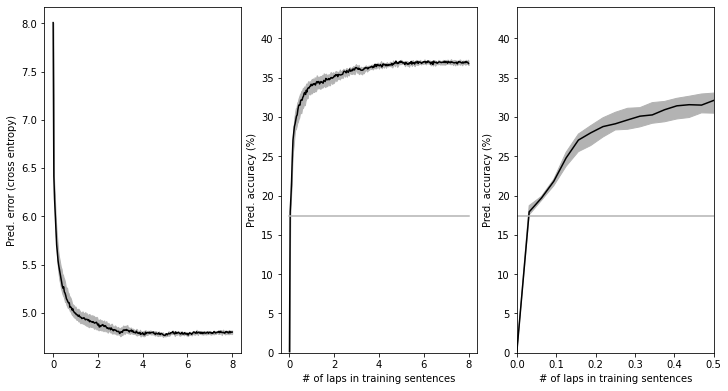

In [ ]:
fig = plt.figure(figsize=(12, 14)) # figure area
plt.subplot(2,3,1); 
plt.fill_between(np.arange(pop_loss.shape[1])/increments, percntl_val_loss[0,:], percntl_val_loss[2,:], color=[0.7, 0.7, 0.7, 1])
plt.plot(np.arange(pop_loss.shape[1])/increments, percntl_val_loss[1,:], color=[0, 0, 0, 1])
plt.ylabel("Pred. error (cross entropy)")

plt.subplot(2,3,2); 
plt.fill_between(np.arange(pop_loss.shape[1])/increments, percntl_val_suc[0,:], percntl_val_suc[2,:], color=[0.7, 0.7, 0.7, 1])
plt.plot(np.arange(pop_loss.shape[1])/increments, percntl_val_suc[1,:], color=[0, 0, 0, 1])
plt.plot([0,8], chance*np.ones((2,)), color=[0.7, 0.7, 0.7, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.ylim([0,44]);

plt.subplot(2,3,3); 
plt.fill_between(np.arange(pop_loss.shape[1])/increments, percntl_val_suc[0,:], percntl_val_suc[2,:], color=[0.7, 0.7, 0.7, 1])
plt.plot(np.arange(pop_loss.shape[1])/increments, percntl_val_suc[1,:], color=[0, 0, 0, 1])
plt.plot([0,8], chance*np.ones((2,)), color=[0.7, 0.7, 0.7, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.xlim([0,0.5]);
plt.ylim([0,44]);

In [ ]:
str_c = ['','i'];

In [ ]:
fig.savefig('./saved_img/pop1_1' +str_c[rnn_cond]+ '.pdf')

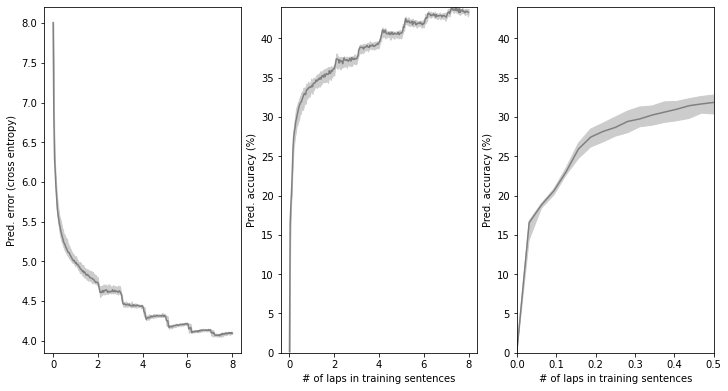

In [ ]:
fig = plt.figure(figsize=(12, 14)) # figure area
plt.subplot(2,3,1); 
plt.fill_between(np.arange(pop_loss.shape[1])/increments, percntl_loss[0,:], percntl_loss[2,:], color=[0.8, 0.8, 0.8, 1])
plt.plot(np.arange(pop_loss.shape[1])/increments, percntl_loss[1,:], color=[0.5, 0.5, 0.5, 1])
plt.ylabel("Pred. error (cross entropy)")

plt.subplot(2,3,2); 
plt.fill_between(np.arange(pop_loss.shape[1])/increments, percntl_suc[0,:], percntl_suc[2,:], color=[0.8, 0.8, 0.8, 1])
plt.plot(np.arange(pop_loss.shape[1])/increments, percntl_suc[1,:], color=[0.5, 0.5, 0.5, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.ylim([0,44]);

plt.subplot(2,3,3); 
plt.fill_between(np.arange(pop_loss.shape[1])/increments, percntl_suc[0,:], percntl_suc[2,:], color=[0.8, 0.8, 0.8, 1])
plt.plot(np.arange(pop_loss.shape[1])/increments, percntl_suc[1,:], color=[0.5, 0.5, 0.5, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.xlim([0,0.5]);
plt.ylim([0,44]);

In [ ]:
fig.savefig('./saved_img/pop1_2' +str_c[rnn_cond]+ '.pdf')

In [ ]:
import seaborn as sns

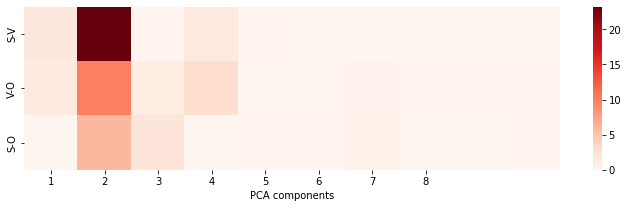

In [ ]:
plt.figure(figsize=(12, 3)) # figure area
sns.heatmap(np.mean(pop_acc_pc_df[:,:3,:], axis=2).T, cmap='Reds',vmin=0);
plt.xticks(np.arange(8)+0.5,np.arange(8)+1);
plt.yticks(np.arange(3)+0.5,['S-V','V-O',"S-O"]);

plt.xlabel('PCA components');

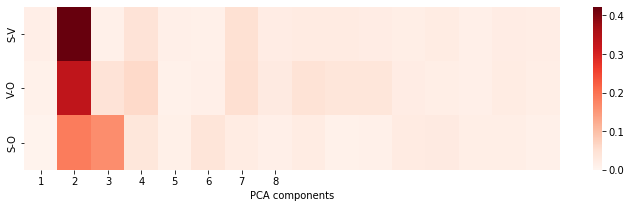

In [ ]:
fig = plt.figure(figsize=(12, 3)) # figure area
sns.heatmap(np.mean(np.square(pop_svm_ax[:16,:3,:]), axis=2).T, cmap='Reds',vmin=0);
plt.xticks(np.arange(8)+0.5,np.arange(8)+1);
plt.yticks(np.arange(3)+0.5,['S-V','V-O',"S-O"]);
plt.xlabel('PCA components');

In [ ]:
fig.savefig('./saved_img/pop1_3' +str_c[rnn_cond]+ '.pdf')

In [ ]:
########### classification accuracy rate of SVM #############
percntl_SVM_ratio = np.percentile(pop_SVM_ratio,[25,50,75],axis=0)
percntl_pca_ratio = np.percentile(pop_pca_ratio,[25,50,75],axis=0)

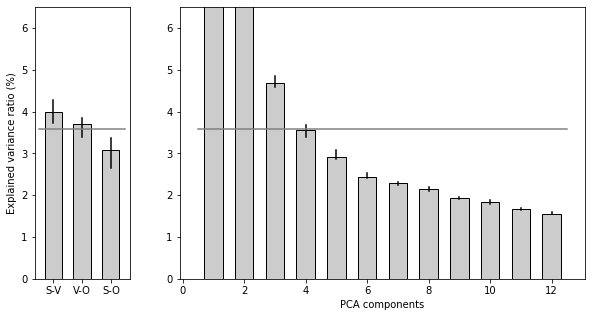

In [ ]:
fig = plt.figure(figsize = (16, 5))
plt.subplot(1,8,4)
plt.bar(['S-V', 'V-O', 'S-O'], 100*percntl_SVM_ratio[1,:3], edgecolor='black',  color = [0.8,0.8,0.8],   width = 0.6);
for i in range(3):     plt.plot(i*np.array([1,1]), 100*percntl_SVM_ratio[[0,2],i], color='black')
plt.plot([-0.5,2.5], np.array([1,1])*np.mean(100*percntl_SVM_ratio[1,:3]), color='gray')
plt.ylim([0, 6.5]);  plt.ylabel('Explained variance ratio (%)');
plt.subplot(1,2,2)
plt.bar(np.arange(12)+1, 100*percntl_pca_ratio[1,:12], edgecolor='black',  color = [0.8,0.8,0.8],   width = 0.6);
for i in range(12):    plt.plot(1+i*np.array([1,1]), 100*percntl_pca_ratio[[0,2],i], color='black')
plt.plot([0.5,12.5], np.array([1,1])*np.mean(100*percntl_SVM_ratio[1,:3]), color='gray')
plt.ylim([0, 6.5]);  plt.xlabel('PCA components');

In [ ]:
100*percntl_SVM_ratio[1,:3]

array([4.0, 3.7, 3.1])

In [ ]:
fig.savefig('./saved_img/pop1_4' +str_c[rnn_cond]+ '.pdf')

In [ ]:
acc_L_io = np.percentile(pop_acc_L_io,[25,50,75],axis=2)
acc_nL_io = np.percentile(pop_acc_nL_io,[25,50,75],axis=2)

In [ ]:
acc_L_io, acc_nL_io

(array([[[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [90.3, 89.1, 66.0, 73.6, 90.2, 64.8],
         [90.2, 86.7, 62.5, 71.1, 89.1, 67.6],
         [63.8, 83.9, 60.5, 55.8, 83.3, 77.2]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [91.0, 90.7, 67.6, 74.4, 91.1, 66.8],
         [90.6, 87.7, 64.1, 71.5, 89.6, 68.3],
         [65.9, 84.5, 61.0, 56.8, 84.0, 77.8]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [91.6, 91.3, 69.4, 75.3, 91.8, 68.7],
         [91.3, 88.4, 65.7, 72.0, 90.1, 68.5],
         [70.5, 84.9, 61.8, 58.8, 84.4, 78.4]]]),
 array([[[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [92.9, 92.0, 65.4, 72.7, 93.1, 74.6],
         [90.8, 90.1, 64.7, 69.7, 90.5, 74.0],
         [83.6, 88.0, 54.4, 57.2, 86.9, 72.7]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [93.5, 93.0, 66.2, 73.4, 93.8, 76.6],
         [92.4, 91.0, 67.2, 71.1, 91.5, 75.8],
         [84.6, 88.9, 55.1, 57.7, 87.9, 73.7]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0]

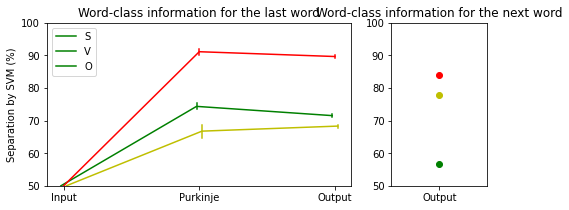

In [ ]:
########### linera SVM ##############
fig = plt.figure(figsize=(12, 3)) # figure area
plt.subplot(1,2,1)
plt.plot(np.arange(3)-0.02, acc_L_io[1,:3,3:4],  color='g');
for i in range(3):     plt.plot(i*np.array([1,1])-0.02, acc_L_io[[0,2],i,3:4], color='g')
plt.plot(np.arange(3)-0.0, acc_L_io[1,:3,4:5],  color='r');
for i in range(3):     plt.plot(i*np.array([1,1])-0.0, acc_L_io[[0,2],i,4:5], color='r')
plt.plot(np.arange(3)+0.02, acc_L_io[1,:3,5:],  color='y');
for i in range(3):     plt.plot(i*np.array([1,1])+0.02, acc_L_io[[0,2],i,5:], color='y')
plt.legend(['S','V','O'])
plt.xticks(np.arange(3)+0,['Input','Purkinje','Output']);  plt.title('Word-class information for the last word');
plt.ylabel('Separation by SVM (%)')
plt.ylim(50,100);
plt.subplot(1,6,4)
plt.plot(acc_L_io[1,-1:,3:4], 'o',  color='g');
plt.plot(acc_L_io[1,-1:,4:5],  'o', color='r');
plt.plot(acc_L_io[1,-1:,5:],  'o', color='y');
plt.xticks([0],['Output']);       plt.title('Word-class information for the next word');
plt.ylim(50,100);

In [ ]:
fig.savefig('./saved_img/pop1_5' +str_c[rnn_cond]+ '.pdf')

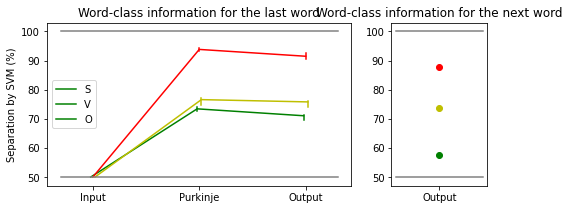

In [ ]:
########### non-linera SVM ##############
fig = plt.figure(figsize=(12, 3)) # figure area
plt.subplot(1,2,1)
plt.plot(np.arange(3)-0.02, acc_nL_io[1,:3,3:4],  color='g');
for i in range(3):     plt.plot(i*np.array([1,1])-0.02, acc_nL_io[[0,2],i,3:4], color='g')
plt.plot(np.arange(3)+0, acc_nL_io[1,:3,4:5],  color='r');
for i in range(3):     plt.plot(i*np.array([1,1])-0.0, acc_nL_io[[0,2],i,4:5], color='r')
plt.plot(np.arange(3)+0.02, acc_nL_io[1,:3,5:],  color='y');
for i in range(3):     plt.plot(i*np.array([1,1])+0.02, acc_nL_io[[0,2],i,5:], color='y')
plt.legend(['S','V','O'])
plt.xticks(np.arange(3)+0,['Input','Purkinje','Output']);  plt.title('Word-class information for the last word');
plt.ylabel('Separation by SVM (%)')
plt.plot([-0.3,2.3],[50,50],  color='gray');  plt.plot([-0.3,2.3],[100,100],  color='gray');  plt.ylim(47,103);
plt.subplot(1,6,4)
plt.plot(acc_nL_io[1,-1:,3:4], 'o',  color='g');
plt.plot(acc_nL_io[1,-1:,4:5],  'o', color='r');
plt.plot(acc_nL_io[1,-1:,5:],  'o', color='y');
plt.xticks([0],['Output']);       plt.title('Word-class information for the next word');
plt.plot([-0.3,0.3],[50,50],  color='gray');  plt.plot([-0.3,0.3],[100,100],  color='gray');  plt.ylim(47,103);

In [ ]:
fig.savefig('./saved_img/pop1_6' +str_c[rnn_cond]+ '.pdf')

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
pop_acc_nL_io[1,4,:], pop_acc_nL_io[2,4,:]

(array([94.8, 95.0, 94.4, 94.9, 94.7, 93.1, 95.7, 93.8, 94.3, 93.9, 91.3,
        93.9, 91.5, 94.1, 92.8, 93.1, 93.2, 92.1, 93.3, 93.6]),
 array([92.5, 93.8, 92.5, 91.1, 89.6, 91.9, 93.2, 92.5, 92.0, 92.0, 86.1,
        90.7, 91.8, 90.7, 88.4, 88.7, 92.6, 91.1, 91.1, 90.1]))

In [ ]:
w, p_s = wilcoxon(pop_acc_nL_io[1,3,:]-pop_acc_nL_io[2,3,:]);
w, p_v = wilcoxon(pop_acc_nL_io[1,4,:]-pop_acc_nL_io[2,4,:]);
w, p_o = wilcoxon(pop_acc_nL_io[1,5,:]-pop_acc_nL_io[2,5,:]);

In [ ]:
p_s, p_v, p_o

(9.5367431640625e-06, 3.814697265625e-06, 0.06372261047363281)

In [ ]:
increments = inc_tmstep_valrate[0];   train_val_rate = inc_tmstep_valrate[2];   ep_lg = (len(loss_his[0])-1)/increments;   
if len(inc_tmstep_valrate)>3:  lr = inc_tmstep_valrate[3];  # available after ver2006
increments, ep_lg, lr[0]

(32, 8.0, 0.0064)

In [ ]:
######### below, only for intact cANN #############

In [ ]:
pop_acc_bins, pop_x_center, pop_bar_w, pop_wd_freq, pop_acc_wd, pop_acc_loc_val_corpus, pop_acc_loc_the, pop_n_bins = [],[],[],[],[],[],[],[]
for i in range(len(files)):
    ver = files[i];
    data3 = loadmat('./saved_mat/v'+str(ver)+'_2.mat')
    pop_acc_bins.append(data3['acc_bins']);  pop_x_center.append(data3['x_center']);  
    pop_bar_w.append(data3['bar_w']);        pop_wd_freq.append(data3['wd_freq']);  
    pop_acc_wd.append(data3['acc_wd']);      pop_acc_loc_val_corpus.append(data3['acc_loc_val_corpus']);    
    pop_acc_loc_the.append(data3['acc_loc_the']);            
    if 'n_bins' in data3:    pop_n_bins.append(data3['n_bins']);  

In [ ]:
pop_acc_bins = np.stack(pop_acc_bins);                  pop_x_center = np.stack(pop_x_center)
pop_bar_w = np.stack(pop_bar_w);                        pop_wd_freq = np.stack(pop_wd_freq)
pop_acc_wd = np.stack(pop_acc_wd);                      pop_acc_loc_val_corpus = np.stack(pop_acc_loc_val_corpus)
pop_acc_loc_the = np.stack(pop_acc_loc_the);    # pop_svm_ax = np.stack(pop_svm_ax, axis=2)

In [ ]:
acc_L_io = np.percentile(pop_acc_L_io,[25,50,75],axis=2)
acc_nL_io = np.percentile(pop_acc_nL_io,[25,50,75],axis=2)

In [ ]:
x_center = pop_x_center[0,:];   bar_w = pop_bar_w[0,:];  

In [ ]:
percentile_acc_bins  = np.percentile(pop_acc_bins,[25,50,75],axis=0)
x1=np.arange(0,6.5,0.002)

In [ ]:
pop_n_bins[0]

[1.0, 2.0, 2.0, 5.0, 5.0, 16.0, 34.0, 75.0, 220.0, 630.0, 1826.0, 183.0]

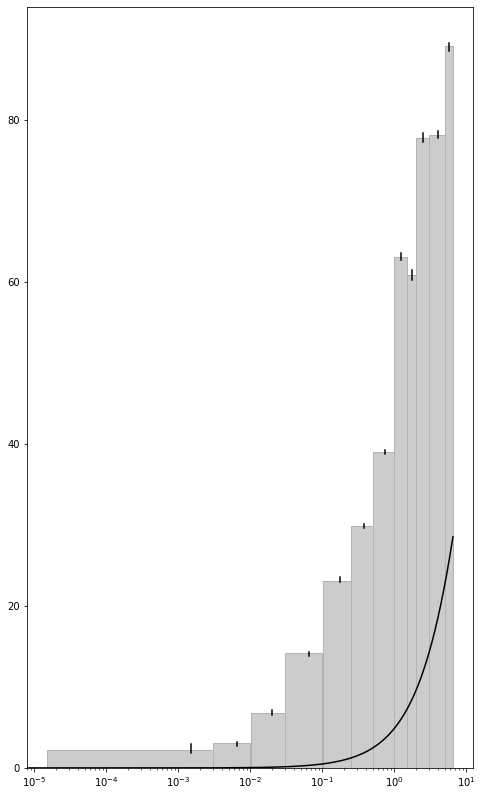

In [ ]:
fig = plt.figure(figsize=(8, 14)) # figure area
plt.bar(x_center, percentile_acc_bins[1,:], width=0.99*bar_w, edgecolor=0.7*np.array([1,1,1]),  color = [0.8,0.8,0.8])
for i in range(len(x_center)):     plt.plot(x_center[i]*np.array([1,1]), percentile_acc_bins[[0,2],i], color='black')
plt.plot(x1, 100-100*np.power(1-x1/100,5), color='black' )
plt.xscale("log")

In [ ]:
fig.savefig('./saved_img/pop1_7' +str_c[rnn_cond]+ '.pdf')

In [ ]:
pop_acc_loc_the

array([[4.9, 11.0, 10.3, 10.2, 6.5, 8.5, 9.4, 10.0, 8.5, 7.9, 7.1, 10.0],
       [5.3, 11.2, 9.8, 7.1, 7.5, 10.6, 8.5, 6.8, 9.0, 10.7, 6.7, 10.7],
       [6.4, 12.8, 8.3, 10.3, 9.2, 9.8, 9.6, 9.7, 5.7, 8.0, 9.1, 8.1],
       [5.9, 10.1, 11.7, 9.9, 5.5, 11.1, 8.6, 11.0, 7.2, 10.4, 11.0, 6.5],
       [5.4, 12.8, 11.5, 7.3, 8.1, 9.3, 9.0, 11.1, 11.1, 8.9, 9.5, 9.5],
       [5.7, 11.4, 10.7, 9.9, 8.1, 8.3, 8.5, 9.8, 9.0, 9.5, 9.7, 7.9],
       [5.3, 12.4, 11.0, 6.3, 7.8, 7.5, 7.8, 6.0, 6.9, 8.4, 10.4, 9.4],
       [4.9, 10.5, 5.3, 8.3, 7.1, 11.0, 8.2, 9.5, 8.5, 7.6, 12.7, 10.3],
       [5.7, 12.7, 10.9, 6.8, 8.5, 7.1, 12.0, 7.5, 7.8, 7.5, 10.2, 8.4],
       [5.8, 11.5, 10.0, 10.3, 9.3, 7.8, 7.9, 8.0, 7.4, 7.9, 7.8, 8.2],
       [5.2, 14.2, 11.5, 8.2, 11.3, 7.8, 7.1, 10.5, 8.5, 9.2, 6.6, 6.9],
       [5.2, 12.7, 12.1, 8.8, 8.7, 8.9, 7.3, 9.3, 8.6, 7.9, 5.8, 8.7],
       [5.5, 13.5, 12.8, 6.8, 9.2, 7.8, 8.4, 9.6, 10.8, 6.1, 6.4, 10.1],
       [3.6, 10.1, 9.9, 6.3, 6.6, 8.7, 8.0, 6.6, 6.8, 7.

In [ ]:
pop_acc_loc_the = np.percentile(pop_acc_loc_the,[25,50,75],axis=0)

In [ ]:
x_1 = np.arange(12)+1

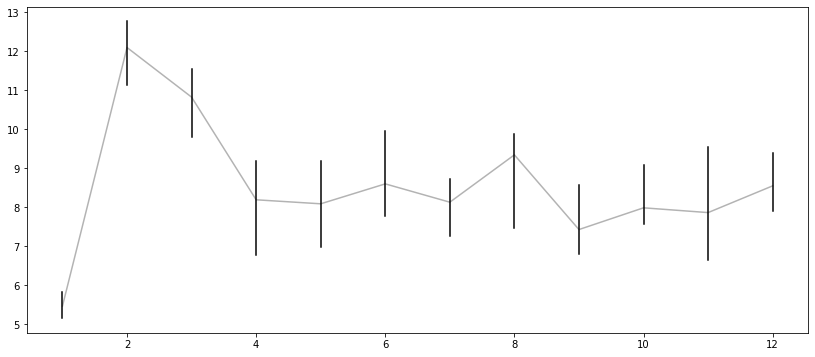

In [ ]:
fig = plt.figure(figsize=(14, 6)) # figure area
plt.plot(x_1, pop_acc_loc_the[1,:],  color=0.7*np.array([1,1,1]))
for i in range(len(x_center)):     plt.plot(x_1[i]*np.array([1,1]), pop_acc_loc_the[[0,2],i], color='black')

In [ ]:
fig.savefig('./saved_img/pop1_8' +str_c[rnn_cond]+ '.pdf')

 'the': 2, 'and': 3, 'of': 4, 'to': 5, 'a': 6, 'in': 7, 'was': 8, 'i': 9, 'he': 10, 'it': 11, 'that': 12, 'not': 13, 'his': 14, 'for': 15, 'you': 16, 'is': 17, 'as': 18, 'her': 19, 'with': 20, 'had': 21,     
 are not suitable after "the".